In [2]:
 #detect time series using moving average
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../generated_cpu_data.csv')
data['date'] = pd.to_datetime(data['date'])

In [4]:
data.tail()

,cpu_util,date
8635,2.692620,2023-07-24 23:38:06.441
8636,30.604348,2023-07-24 23:43:06.441
8637,14.278655,2023-07-24 23:48:06.441
8638,35.247145,2023-07-24 23:53:06.441
8639,6.065125,2023-07-24 23:58:06.441


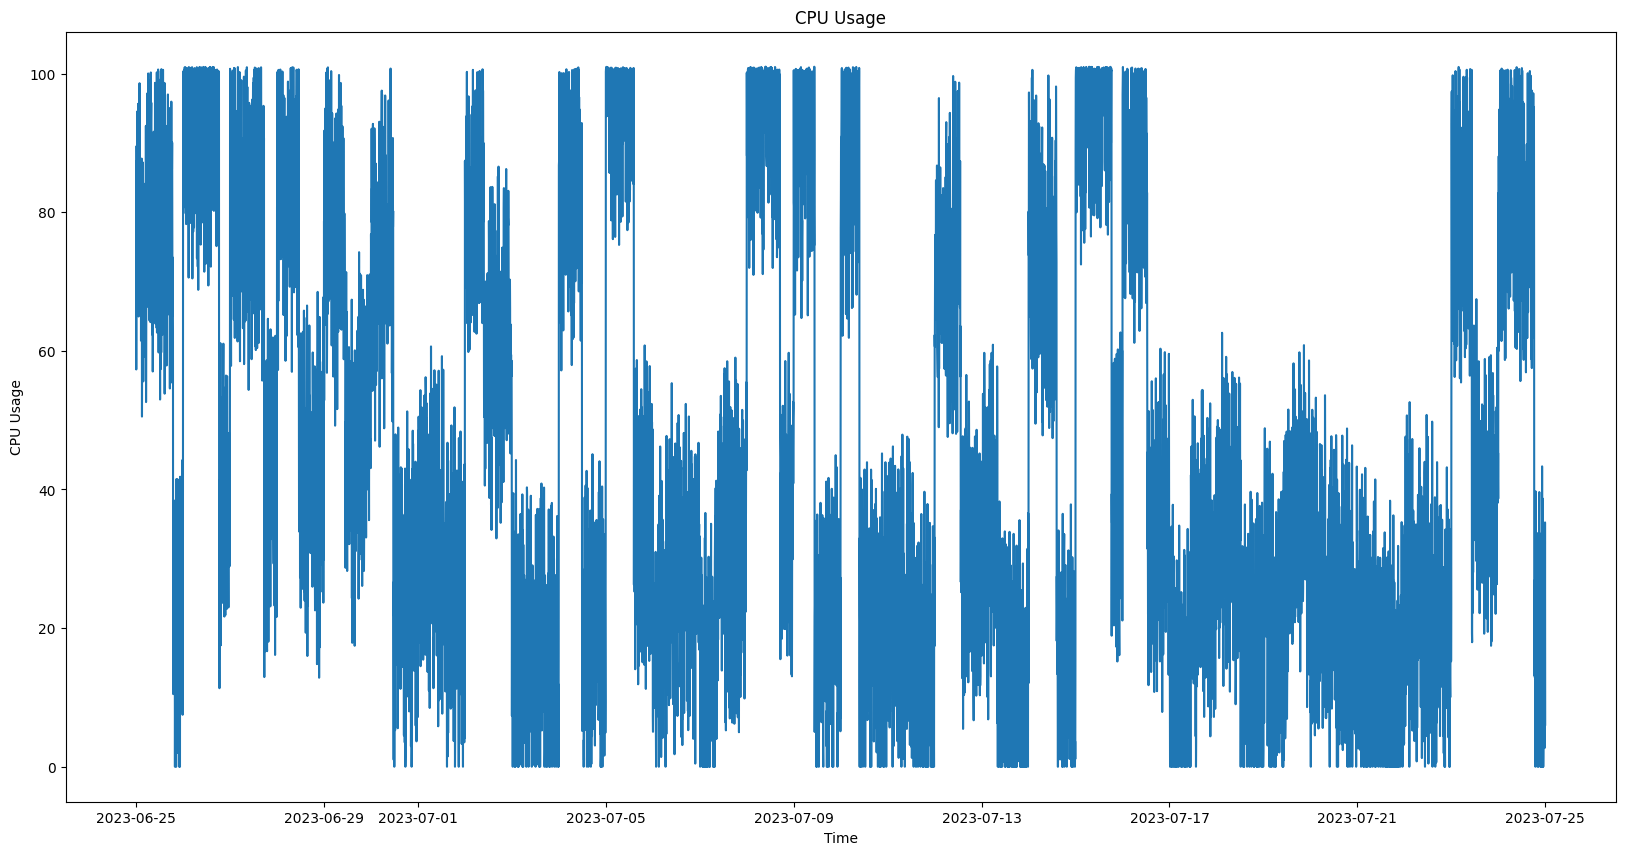

In [5]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['cpu_util'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [6]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

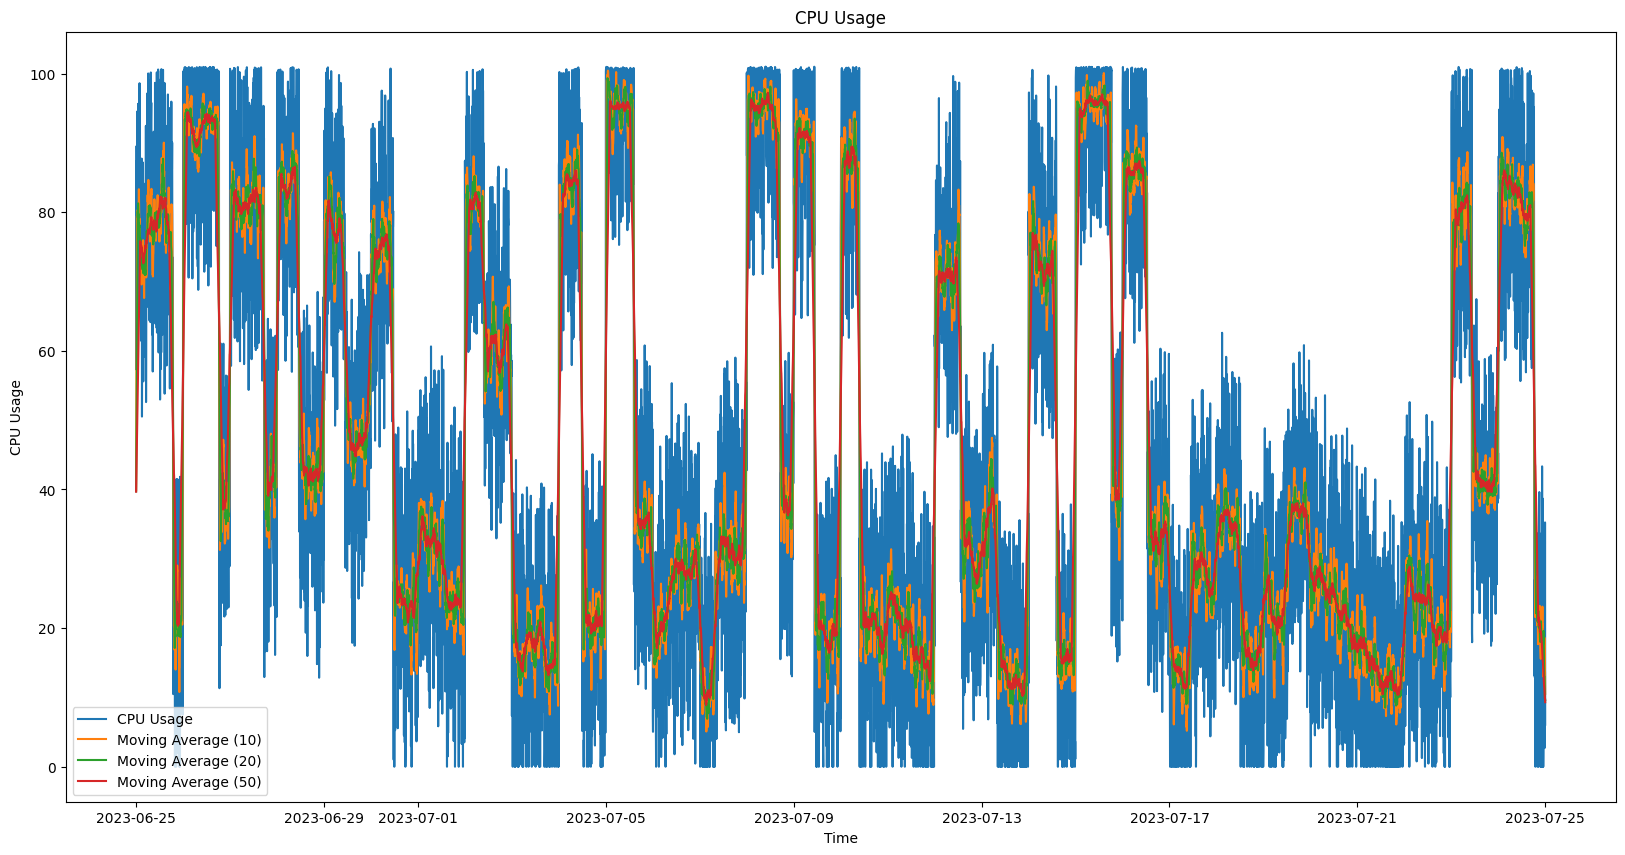

In [7]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['cpu_util'], label='CPU Usage')
plt.plot(data['date'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.plot(data['date'], moving_average(data['cpu_util'], 20), label='Moving Average (20)')
plt.plot(data['date'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [8]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [9]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


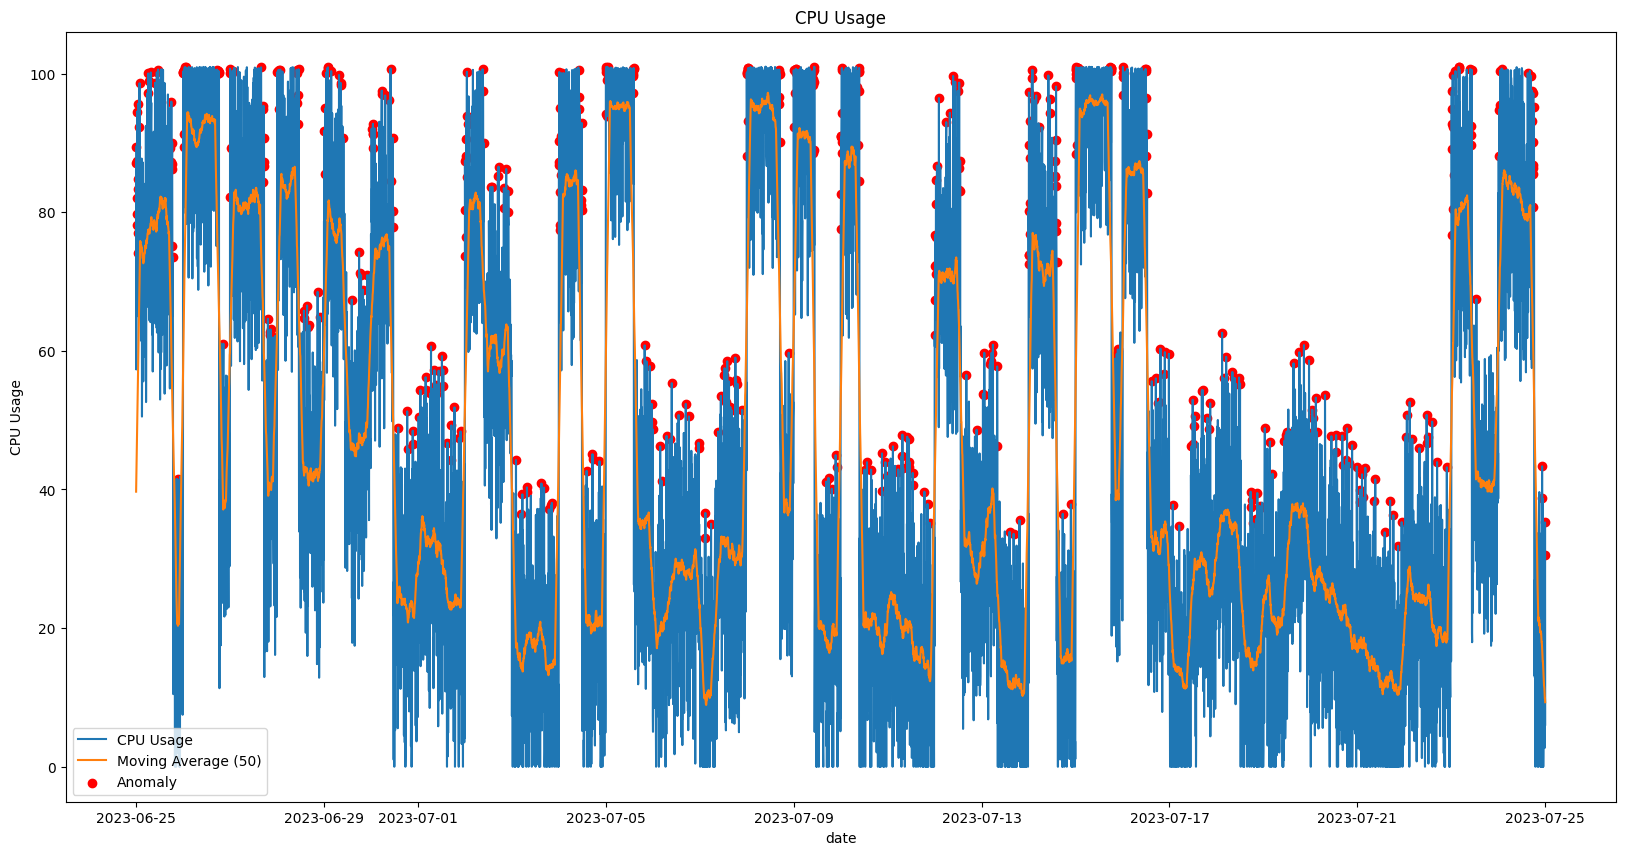

In [53]:
#plot anomaly with window size 50 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['cpu_util'], label='CPU Usage')
plt.plot(data['date'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.scatter(data['date'][detect_anomaly(data['cpu_util'], 50, 1.5)], data['cpu_util'][detect_anomaly(data['cpu_util'], 50, 1.5)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('date')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-06-30'), pd.Timestamp('2023-07-01'))
# plt.xlim(pd.Timestamp('2023-07-02'), pd.Timestamp('2023-07-08'))
plt.legend()
plt.show()


In [12]:
anomaly = detect_anomaly(data['cpu_util'], 50, 1.5)
anomaly = np.array(anomaly)
len(anomaly)

558

In [55]:
data['anomaly'] = 0
data['anomaly'][anomaly] = 1
data.head()

,cpu_util,date,anomaly
0,89.447320,2023-06-25 00:03:05.640,1
1,57.320538,2023-06-25 00:08:05.640,0
2,87.058688,2023-06-25 00:13:05.640,1
3,87.409467,2023-06-25 00:18:05.640,1
4,78.111494,2023-06-25 00:23:05.640,1


In [56]:
data.to_csv('../generated_cpu_data_with_anomaly.csv', index=False)

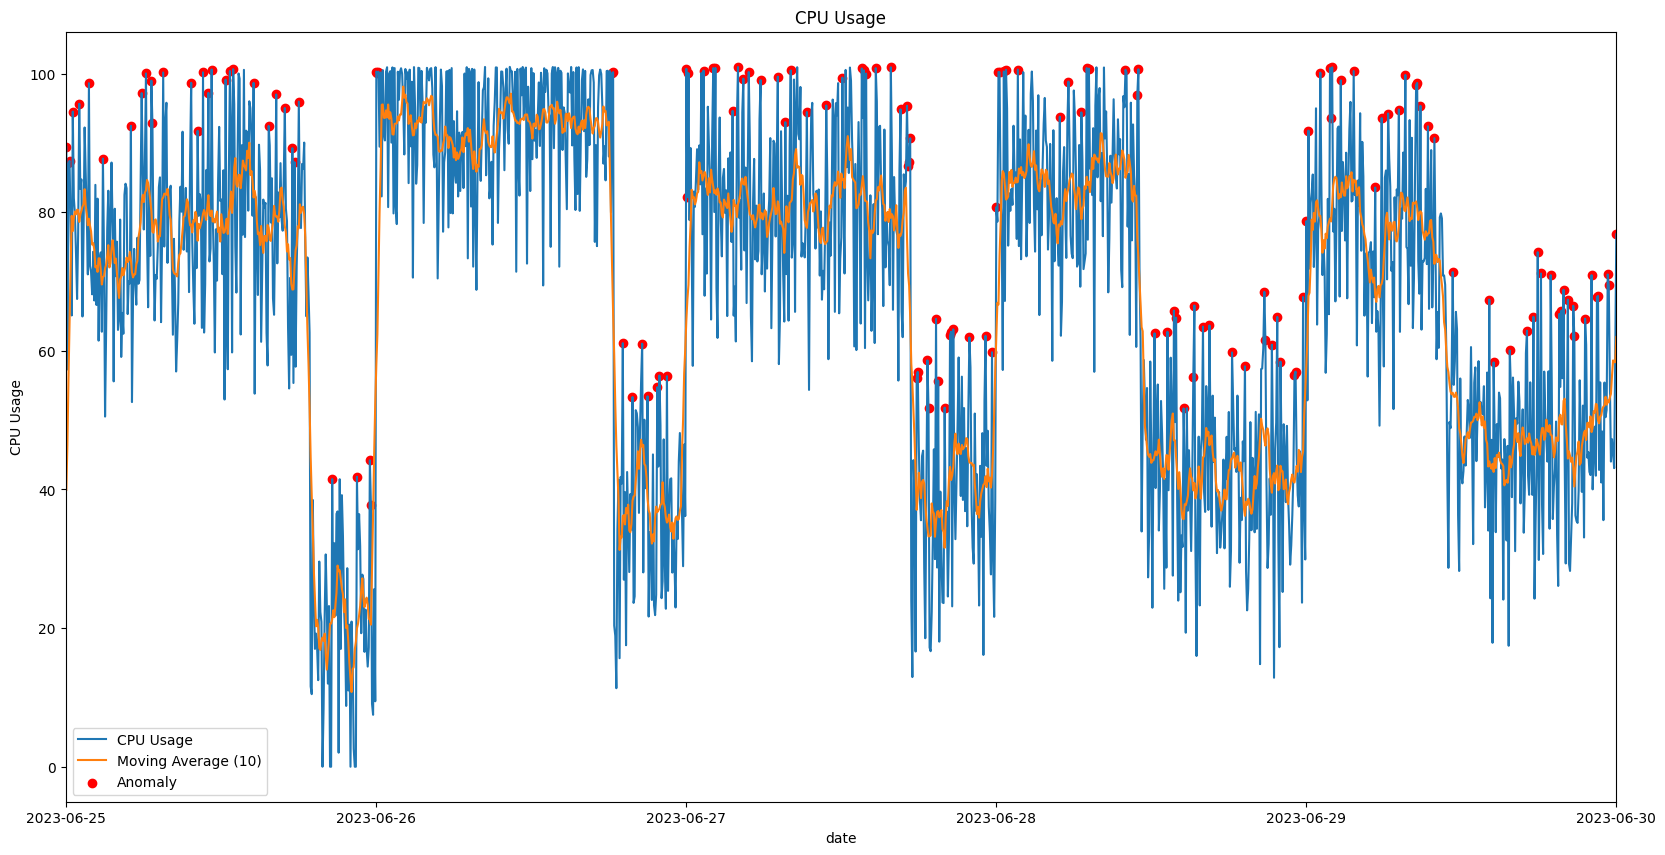

In [23]:
#plot anomaly with window size 50 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['cpu_util'], label='CPU Usage')
plt.plot(data['date'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.scatter(data['date'][detect_anomaly(data['cpu_util'], 10, 1.3)], data['cpu_util'][detect_anomaly(data['cpu_util'], 10, 1.3)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('date')
plt.ylabel('CPU Usage')
plt.xlim(pd.Timestamp('2023-06-25'), pd.Timestamp('2023-06-30'))
# plt.xlim(pd.Timestamp('2023-07-02'), pd.Timestamp('2023-07-08'))
plt.legend()
plt.show()


In [24]:
anomaly = detect_anomaly(data['cpu_util'], 10, 1.3)
anomaly = np.array(anomaly)
len(anomaly)

879

In [25]:
data['anomaly'] = 0
data['anomaly'][anomaly] = 1
data.head()

,cpu_util,date,anomaly
0,89.447320,2023-06-25 00:03:05.640,1
1,57.320538,2023-06-25 00:08:05.640,0
2,87.058688,2023-06-25 00:13:05.640,1
3,87.409467,2023-06-25 00:18:05.640,1
4,78.111494,2023-06-25 00:23:05.640,0


In [26]:
data.to_csv('../generated_cpu_data_with_anomaly_v2.csv', index=False)